In [ ]:
#pip install imblearn

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

testing = pd.read_csv('C:/Users/1VinNniE1/Desktop/тупа учеба/МО/poker-hand-training-true.csv', engine = 'python')
training = pd.read_csv('C:/Users/1VinNniE1/Desktop/тупа учеба/МО/poker-hand-testing.csv', engine = 'python')

import catboost as cb

pd.set_option('display.max_columns', 600)

# <center> Предобработка </center> #

In [2]:
testing.head()

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


### <center> Переименование столбцов </center>

In [3]:
testing.columns = ['Color1', 'Rank1', 'Color2', 'Rank2', 'Color3', 'Rank3', 'Color4', 'Rank4', 'Color5', 'Rank5', 'HandName']
training.columns = ['Color1', 'Rank1', 'Color2', 'Rank2', 'Color3', 'Rank3', 'Color4', 'Rank4', 'Color5', 'Rank5', 'HandName']
testing.head()

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [4]:
training.head()

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [5]:
print(testing.shape)
print(training.shape)

(25009, 11)
(999999, 11)


In [6]:
print('Количество комбинаций в датасете:')
print('testing')
print(testing.groupby('HandName').size())
print('training')
print('\n',training.groupby('HandName').size())

Количество комбинаций в датасете:
testing
HandName
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        4
dtype: int64
training

 HandName
0    501208
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
dtype: int64


### <center> Уравнивание классов

In [15]:
training_cut = training.sort_values(by = ['HandName']).reset_index(drop = True)
training_cut.head()

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
0,4,9,2,11,2,13,2,2,1,3,0
1,2,5,4,7,2,12,4,3,3,2,0
2,3,12,2,13,3,8,2,11,3,4,0
3,3,4,1,5,3,13,2,8,1,10,0
4,2,8,1,9,3,7,4,12,3,10,0


In [16]:
training_cut = training_cut.drop(training_cut.index[0:400000])

In [17]:
training_cut.reset_index(drop = True)

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
0,4,2,4,6,2,13,2,11,2,12,0
1,2,3,2,5,2,4,3,2,4,13,0
2,4,12,4,10,3,5,1,4,3,2,0
3,1,10,4,9,4,7,1,8,3,5,0
4,1,3,3,4,3,11,2,12,4,8,0
5,4,9,3,10,1,7,3,6,4,11,0
6,3,11,4,2,3,4,2,5,1,12,0
7,3,1,2,12,1,8,1,7,4,3,0
8,1,11,2,6,2,2,2,1,2,3,0
9,1,11,3,2,4,12,4,1,3,5,0


In [18]:
print('training_cut')
print('\n',training_cut.groupby('HandName').size())

training_cut

 HandName
0    101208
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
dtype: int64


In [19]:
training_cut = training_cut.drop(training_cut.index[101209:401209])

In [20]:
print('training_cut')
print('\n',training_cut.groupby('HandName').size())

training_cut

 HandName
0    101208
1    122498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
dtype: int64


In [21]:
training = training_cut

### <center> Корреляционная матрица </center>

In [22]:
myCorrelation = testing.corr()

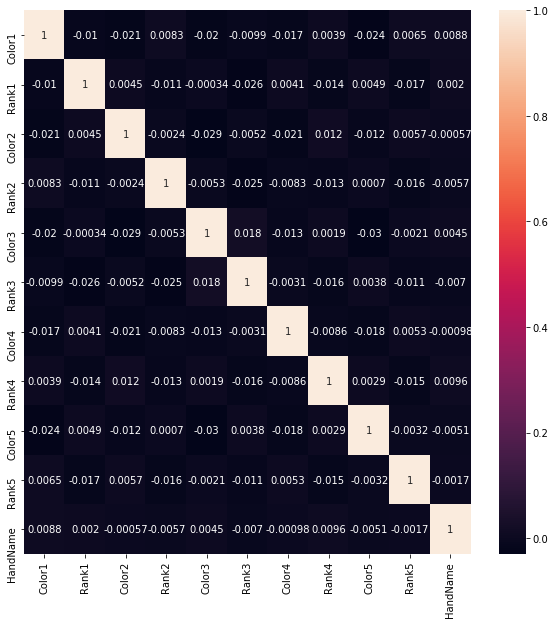

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(myCorrelation, annot = True)

### <center> Генерация признаков </center>

In [24]:
all_data = pd.concat([training, testing]).reset_index(drop=True)
all_data.head()

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
0,4,2,4,6,2,13,2,11,2,12,0
1,2,3,2,5,2,4,3,2,4,13,0
2,4,12,4,10,3,5,1,4,3,2,0
3,1,10,4,9,4,7,1,8,3,5,0
4,1,3,3,4,3,11,2,12,4,8,0


In [25]:
all_data.shape

(325008, 11)

In [26]:
all_data_new = all_data

In [27]:
ohe = OneHotEncoder(sparse = False, dtype = np.int16)
new_features_ohe = ohe.fit_transform(all_data.Color1.values.reshape(-1, 1))
tmp = pd.DataFrame(new_features_ohe, columns=['Color=' + str(i+1) for i in range(new_features_ohe.shape[1])])
all_data_new = pd.concat([all_data,tmp], axis = 1)

F:\Users\VinNniE\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [28]:
new_features_ohe = ohe.fit_transform(all_data.Rank1.values.reshape(-1, 1))
tmp = pd.DataFrame(new_features_ohe, columns=['Rank=' + str(i+1) for i in range(new_features_ohe.shape[1])])
all_data_new = pd.concat([all_data_new,tmp], axis = 1)

F:\Users\VinNniE\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [29]:
all_data_new.head()

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName,Color=1,Color=2,Color=3,Color=4,Rank=1,Rank=2,Rank=3,Rank=4,Rank=5,Rank=6,Rank=7,Rank=8,Rank=9,Rank=10,Rank=11,Rank=12,Rank=13
0,4,2,4,6,2,13,2,11,2,12,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,3,2,5,2,4,3,2,4,13,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,12,4,10,3,5,1,4,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,10,4,9,4,7,1,8,3,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,3,3,4,3,11,2,12,4,8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
print('all_data_new')
print('\n',all_data_new.groupby('HandName').size())

all_data_new

 HandName
0    113701
1    133097
2     48828
3     21634
4      3978
5      2050
6      1460
7       236
8        17
9         7
dtype: int64


### <center> Over-under sampling </center>

In [31]:
all_data_new.shape

(325008, 28)

In [32]:
X = all_data_new.drop(['HandName'],axis=1)
y = all_data_new.HandName

In [33]:
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_sample(X, y)

In [34]:
X_res.shape

(1330970, 27)

In [35]:
y_res.shape

(1330970,)

# <center> Построение моделей </center>

### <center> CatBoost </center>

In [36]:
cat = cb.CatBoostClassifier(loss_function='MultiClassOneVsAll', random_seed = 123)
X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

In [38]:
X_train_res.shape

(1064776, 27)

In [39]:
cat_model = cat.fit(X_train_res,y_train_res,verbose=False)

In [40]:
cat_predAt = cat_model.predict(X_test, prediction_type='Class')
cat_predLLt = cat_model.predict(X_test, prediction_type='Probability')
print("Test accuracy: {}".format(accuracy_score(y_test,cat_predAt)))
print("Test logloss: {}".format(log_loss(y_test,cat_predLLt)))

Test accuracy: 0.8020616542822152
Test logloss: 0.5887311828348722


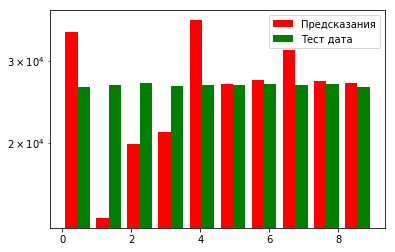

<Figure size 1080x1080 with 0 Axes>

In [41]:
plt.hist((np.reshape(cat_predAt,(y_test.shape[0],)),y_test),bins = 10, log = True, color = ['Red', 'Green'])
plt.legend(labels=('Предсказания','Тест дата'))
plt.figure(figsize = (15,15))
plt.show()

### <center> Precision-Recall, F-score </center>

In [42]:
report = classification_report(y_test, cat_predAt)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.88      0.76     26345
           1       0.61      0.32      0.42     26666
           2       0.69      0.51      0.58     26852
           3       0.76      0.60      0.67     26525
           4       0.69      0.95      0.80     26591
           5       0.96      0.97      0.97     26607
           6       0.79      0.81      0.80     26734
           7       0.83      0.98      0.90     26692
           8       0.99      1.00      0.99     26798
           9       0.98      1.00      0.99     26384

   micro avg       0.80      0.80      0.80    266194
   macro avg       0.80      0.80      0.79    266194
weighted avg       0.80      0.80      0.79    266194



### <center> Random Forest

In [48]:
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
#rf.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)